In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Load the image
image = plt.imread('images/jacob.jpeg')

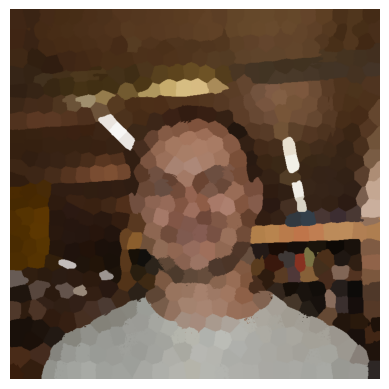

In [90]:
# Convert the image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

# Create a superpixel segmenter
slic = cv2.ximgproc.createSuperpixelSLIC(
    lab_image, algorithm=cv2.ximgproc.SLICO, region_size=30, ruler=10.0
)

# Perform the superpixel segmentation
slic.iterate(10)

# Get the labels of the superpixels
labels = slic.getLabels()

# Create an output image to store the interpolated result
superpixel_image = image.copy()

# Iterate through each unique label
for label in np.unique(labels):
    # Create a mask for the current label
    mask = (labels == label)
    
    # Calculate the average color of the superpixel
    average_color = np.mean(image[mask], axis=0)
    
    # Assign the average color to the output image
    superpixel_image[mask] = average_color

# Display the result
plt.imshow(superpixel_image)
plt.axis('off')
plt.show()

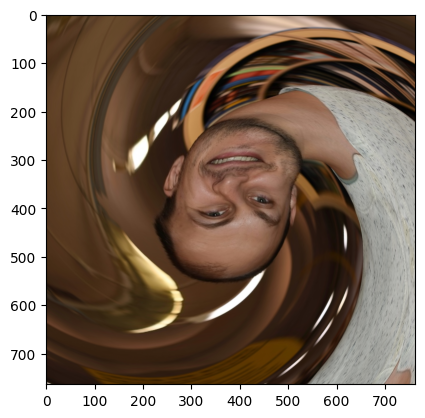

In [65]:
from skimage.transform import swirl

swirled = swirl(image, rotation=0, strength=10, radius=10000)

plt.imshow(swirled)
plt.show()


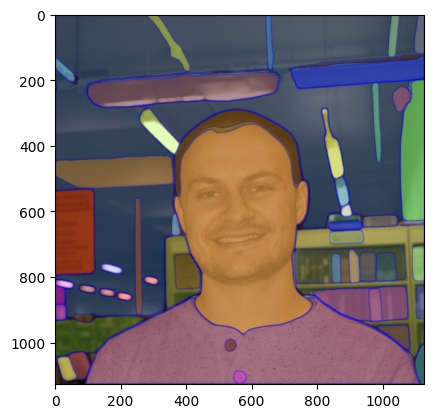

In [78]:
sam = plt.imread('images/jacob_sam.png')
sam = sam[:, :, :3]
plt.imshow(sam)

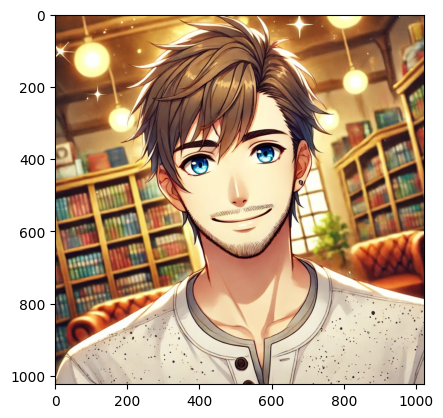

In [71]:
anime = plt.imread('images/jacob_anime.jpg')
plt.imshow(anime)

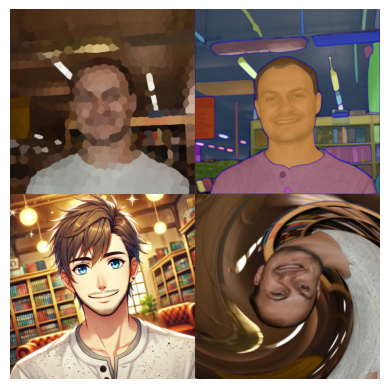

In [81]:
# Resize all images to the same size
def resize_image(image, size):
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

# Define the target size
target_size = (300, 300)

# Resize the images
superpixel_resized = resize_image(superpixel_image, target_size)
sam_resized = resize_image((sam * 255).astype(np.uint8), target_size)  # Convert sam to uint8
anime_resized = resize_image(anime, target_size)
swirled_resized = resize_image((swirled * 255).astype(np.uint8), target_size)  # Convert swirled to uint8

# Create a composite image
composite_image = np.zeros((target_size[0] * 2, target_size[1] * 2, 3), dtype=np.uint8)

# Place each image in a quadrant
composite_image[:target_size[0], :target_size[1]] = superpixel_resized
composite_image[:target_size[0], target_size[1]:] = sam_resized
composite_image[target_size[0]:, :target_size[1]] = anime_resized
composite_image[target_size[0]:, target_size[1]:] = swirled_resized

# Display the composite image
plt.imshow(composite_image)
plt.axis('off')
plt.show()

In [84]:
plt.imsave('images/jacob_composite_image.jpg', composite_image)